Данные предоставлены Яндексом в рамках конкурса Сириус.ИИ, для создания сервиса по прогнозированию стоимости недвижимости
[Ссылка на описание кейса](https://sochisirius.ru/uploads/f/%D0%AF%D0%BD%D0%B4%D0%B5%D0%BA%D1%81+%D0%A4%D0%9A%D0%9D_%D0%BF%D1%80%D0%B5%D0%B7%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F%20(2%20%D1%82%D1%83%D1%80).pdf)

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import OneHotEncoder

In [51]:
df_train_orig = pd.read_csv('train.csv')

In [52]:
df_train_orig

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


# **Работа датасетом**

In [53]:
df_train = df_train_orig.copy() #Тк планируется изменение  в файле, делаем копию

In [54]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

Можно заметить, что тип некоторых признаков object, что не очень хорошо, тк перед нами стоит задача регрессии и будет удобнее работать с числовыми данными

In [55]:
col = df_train.columns
for el in col:
  if df_train[el].dtype == object:
    print(el)

timestamp
product_type
sub_area
culture_objects_top_25
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion
railroad_terminal_raion
big_market_raion
nuclear_reactor_raion
detention_facility_raion
water_1line
big_road1_1line
railroad_1line
ecology


timestamp
product_type: покупка или инвестиция владельца-арендатора

sub_area: название района

culture_objects_top_25: топ 25 объектов культуры

thermal_power_plant_raion: район ТЭЦ

incineration_raion: мусоросжигательный район

oil_chemistry_raion: нефтехимический район

radiation_raion: радиационный район

railroad_terminal_raion: железнодорожный вокзал района

big_market_raion: большой рыночный район

nuclear_reactor_raion: ядерный реакторный район

detention_facility_raion: следственный изолятор района

water_1line: вода 1 линия

big_road1_1line: большая дорога1 1 линия

railroad_1line: железная дорога 1 линия

ecology: экология

In [56]:
col = df_train.columns
for el in col:
  if df_train[el].dtype == object:
    print(f"{el}: {df_train[el].unique()}")

timestamp: ['2011-08-20' '2011-08-23' '2011-08-27' ... '2015-06-27' '2015-06-29'
 '2015-06-30']
product_type: ['Investment' 'OwnerOccupier']
sub_area: ['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Basmannoe'
 'Nizhegorodskoe' "Sokol'niki" 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe'
 'Zapadnoe Degunino' 'Presnenskoe' 'Lefortovo' "Mar'ino" "Kuz'minki"
 'Nagornoe' "Gol'janovo" 'Vnukovo' 'Juzhnoe Tushino' 'Severnoe Tushino'
 "Chertanovo Central'noe" 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino'
 'Bogorodskoe' 'Jaroslavskoe' 'Strogino' 'Hovrino' "Moskvorech'e-Saburovo"
 'Staroe Krjukovo' 'Ljublino' 'Caricyno' 'Veshnjaki' 'Danilovskoe'
 'Preobrazhenskoe' "Kon'kovo" 'Brateevo' 'Vostochnoe Izmajlovo'
 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo' 'Rostokino'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Babushkinskoe'
 'Pokrovskoe Streshnevo' 'O

Признаки где вариантов значения два заменим на 0/1(0 - No, 1 - yes)

In [57]:
col = df_train.columns
for el in col:
  if df_train[el].dtype == object:
    if len(df_train[el].unique()) == 2 and el != 'product_type':
      df_train[el] = df_train[el].replace('no', 0)
      df_train[el] = df_train[el].replace('yes', 1)

Рассмотрим колонку с района москвы, где находится недвижимость, это сильно влияет на стоимоть, поэтому можно объединить признаки в округа москвы, а потом применить onehot_encode(), если применить этот метод к имеющимся данным, то датасет сильно раздуется, что может плохо повлиять на предсказание

In [58]:
def assign_ethnicity(row):
    if row['sub_area'] in ['Arbat', 'Basmannoe', "Zamoskvorech'e",
                           "Krasnosel'skoe", 'Meshhanskoe',
                            'Presnenskoe', 'Taganskoe',
                            'Tverskoe', 'Hamovniki', 'Jakimanka']:
        return 'central'
    elif row['sub_area'] in ['Ajeroport', 'Begovoe', 'Beskudnikovskoe',
                            'Vojkovskoe', 'Vostochnoe Degunino',
                            'Golovinskoe', 'Dmitrovskoe',
                            'Zapadnoe Degunino', "Koptevo", 'Levoberezhnoe',
                            'Molzhaninovskoe', 'Savelovskoe',
                            'Sokol', 'Timirjazevskoe', 'Hovrino',
                            'Horoshevskoe']:
        return 'northern'
    elif row['sub_area'] in ['Alekseevskoe', "Altuf'evskoe", 'Babushkinskoe',
                             'Bibirevo', 'Butyrskoe',
                              'Lianozovo', 'Losinoostrovskoe',
                              'Marfino', "Mar'ina Roshha", 'Ostankinskoe',
                              'Otradnoe', 'Rostokino', 'Sviblovo', 'Severnoe',
                              'Severnoe Medvedkovo',
                                        'Juzhnoe Medvedkovo', 'Jaroslavskoe']:
        return 'northeastern'
    elif row['sub_area'] in ['Bogorodskoe', 'Veshnjaki', 'Vostochnoe',
                            'Vostochnoe Izmajlovo', "Gol'janovo",
                            'Ivanovskoe', 'Izmajlovo', 'Kosino-Uhtomskoe',
                            'Metrogorodok', 'Novogireevo',
                            'Novokosino', 'Perovo', 'Preobrazhenskoe',
                            'Severnoe Izmajlovo', 'Sokolinaja Gora',
                                   "Sokol'niki"]:
        return 'eastern'
    elif row['sub_area'] in ['Vyhino-Zhulebino', 'Kapotnja', "Kuz'minki",
                            "Lefortovo", 'Ljublino', "Mar'ino",
                            'Nekrasovka', "Nizhegorodskoe",
                             'Pechatniki', 'Rjazanskij', "Tekstil'shhiki",
                                        'Juzhnoportovoe']:
         return 'southeastern'
    elif row['sub_area'] in  ['Birjulevo Vostochnoe', 'Birjulevo Zapadnoe',
                             'Brateevo', 'Danilovskoe', 'Donskoe',
                             'Zjablikovo', "Moskvorech'e-Saburovo",
                             'Nagatino-Sadovniki', 'Nagatinskij Zaton',
                             "Nagornoe", 'Orehovo-Borisovo Severnoe',
                              'Orehovo-Borisovo Juzhnoe', 'Caricyno',
                                    'Chertanovo Severnoe',
                              "Chertanovo Central'noe", 'Chertanovo Juzhnoe']:
         return 'southern'
    elif row['sub_area'] in  ['Akademicheskoe', 'Gagarinskoe', 'Zjuzino',
                             "Kon'kovo", 'Kotlovka',
                                        'Lomonosovskoe', 'Obruchevskoe',
                              'Severnoe Butovo', 'Teplyj Stan',
                                        'Cheremushki',
                                        'Juzhnoe Butovo', 'Jasenevo']:
         return 'southwestern'
    elif row['sub_area'] in  ["Vnukovo", 'Dorogomilovo', 'Krylatskoe', 'Kuncevo',
                             'Mozhajskoe', 'Novo-Peredelkino',
                                   'Ochakovo-Matveevskoe', 'Prospekt Vernadskogo',
                              'Ramenki', 'Solncevo',
                                   'Troparevo-Nikulino', 'Filevskij Park',
                             'Fili Davydkovo']:
         return 'western'
    elif row['sub_area'] in  ['Kurkino', 'Mitino', 'Pokrovskoe Streshnevo',
                             'Severnoe Tushino', 'Strogino',
                                        'Horoshevo-Mnevniki', 'Shhukino',
                              'Juzhnoe Tushino']:
         return 'northwestern'
    elif row['sub_area'] in  ['Matushkino', 'Savelki', 'Staroe Krjukovo',
                             'Silino', 'Krjukovo']:
         return 'zelenograd'
    elif row['sub_area'] in  ['Poselenie Voskresenskoe', 'Poselenie Vnukovskoe',
                             'Poselenie Desjonovskoe',
                                          'Poselenie Kokoshkino',
                              'Poselenie Marushkinskoe', 'Poselenie Moskovskij',
                                          'Poselenie Mosrentgen',
                              'Poselenie Rjazanovskoe', 'Poselenie Sosenskoe',
                                          'Poselenie Filimonkovskoe', 'Poselenie Shherbinka']:
         return 'novomoskovskiy'
    else:
         return 'troitskiy'


df_train['sub_area'] = df_train.apply(assign_ethnicity, axis=1)

In [59]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df_train[['sub_area']]). toarray ())

df_train = df_train.join (encoder_df)

In [60]:
df_train.rename(columns = {0:'northeastern', 1:'southern', 2:'southeastern',
                           3:'northwestern', 4:'central', 5: 'eastern', 6: 'northern',
                           7:'western', 8:'zelenograd', 9:'southwestern',
                           10: 'novomoskovskiy', 11: 'troitskiy'}, inplace = True )

Поработаем с колонкой 'ecology', можно заметить что есть колонки со знаением no data, следовательно это считается как пропуск, заполним эти пропуски средним значением по окраске - удовлетворительно('satisfactory')

In [61]:
df_train['ecology'] = df_train['ecology'].replace('no data', 'satisfactory')

In [62]:
encoder_df = pd.DataFrame(encoder.fit_transform(df_train[['ecology']]). toarray ())

df_train = df_train.join (encoder_df)

In [63]:
df_train.rename(columns = {0: 'good', 1: 'excellent', 2: 'poor', 3: 'satisfactory'}, inplace=True)

In [64]:
del df_train['ecology']

# Обработка пропусков

In [65]:
import io
buffer = io.StringIO()
colns = df_train.columns
s = df_train.isnull().sum() / len(df_train) * 100
with open("df_info.txt", "w",
          encoding="utf-8") as f:
    for i in range(len(colns)):
        f.write(f"{colns[i]}:  {str(round(s[i], 2))}%\n")

В файле df_info.txt теперь хранить информация о столбцах, где присутствуют пропуски и их процентное соотношение




1.life_sq:  20.56%
Жилая площадь без учета нежилых помещений, мы предполагаем, что такие пропуски встречаются там, где нежилых помещений нет, следовательно пропуски можно заполнить информацией из столбца full_sq

In [66]:
df_train['life_sq'] = df_train['life_sq'].fillna(df_train['full_sq'])

2.floor: 0, 94% Этаж не указан в неквартирной недвижимости, поэтому заменим их 0

In [67]:
df_train['floor'] = df_train['floor'].fillna(0)

3.Можно заметить, что далее в столбцах max_floor, material, built_year, num_room, kitch_kq, state большой и близций по значению процент пропусков, посмотрим на визуализацию пропусков

<Axes: >

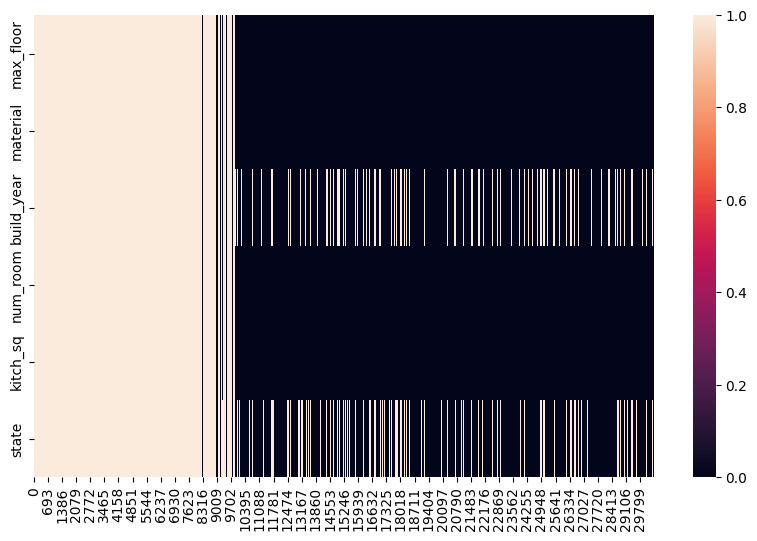

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train[['max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state']].isna().transpose())

Количество комнат, площадь кухни, материал дома - крайне важные признаки при оуенке картиры, также можно заметить, что эти пропуски в данных встречаются одновременно, поэтому можно удалить строки с пропусками в этих данных и потерять 53% данных


In [69]:
df_train = df_train.dropna(subset=['num_room'])

<Axes: >

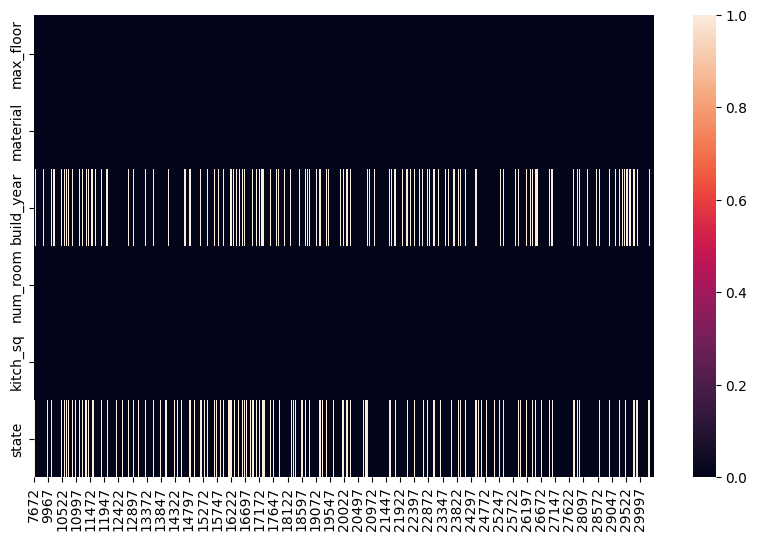

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train[['max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state']].isna().transpose())

Можно заметить также пропуски в данных по состоянию квартиры и году постройки. Состояние недвижимости крайне важно, как и год постройки, также эти данные сложно заменить дургими значениями, поэтому строки с пропущенными значениями придется удалить

In [71]:
df_train = df_train.dropna(subset=['state'])
df_train = df_train.dropna(subset=['build_year'])

Посмотрим на оставшиеся пропуски

<Axes: >

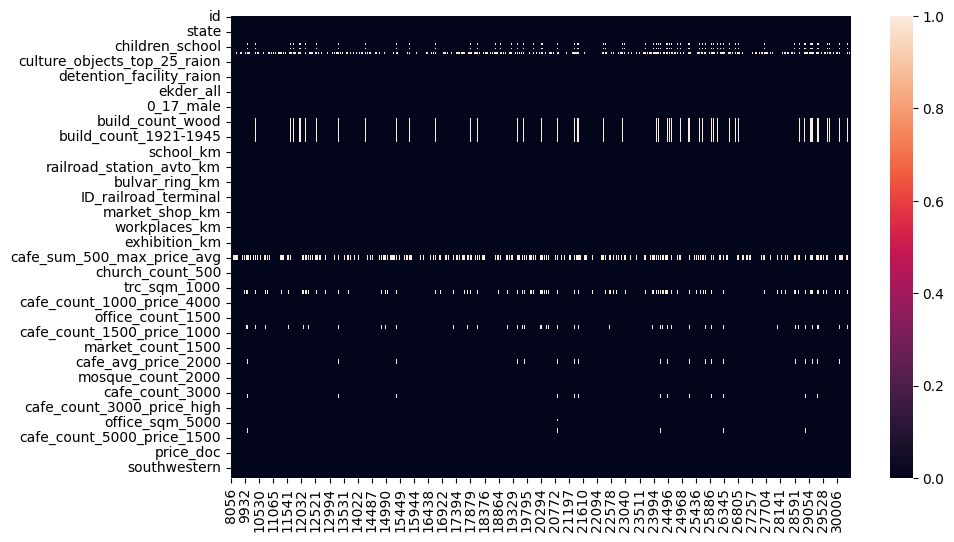

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isna().transpose())

Посмотрим на корреляцию стобцов с пропусками, чтобы понять можем ли мы их удалить или нет

In [73]:
col = df_train.columns.tolist()
s = df_train.isnull().sum ()/ len(df_train) * 100
for i in range(len(col)):
  if s[i] != 0:
    print(f"{col[i]}:  {df_train['price_doc'].corr(df_train[col[i]])}")

preschool_quota:  -0.08368678579200245
school_quota:  -0.012125127279131918
hospital_beds_raion:  0.09038731088865892
raion_build_count_with_material_info:  0.05029616451183127
build_count_block:  -0.008697845061843684
build_count_wood:  -0.0426123854272847
build_count_frame:  -0.025761666904834796
build_count_brick:  0.1990038290373116
build_count_monolith:  0.11616987385488901
build_count_panel:  -0.06645255662070841
build_count_foam:  0.0015529467708348733
build_count_slag:  -0.028105107437733673
build_count_mix:  -0.024920882515226013
raion_build_count_with_builddate_info:  0.05014460112971288
build_count_before_1920:  0.1441104822956714
build_count_1921-1945:  0.02860600744414443
build_count_1946-1970:  0.03914279654939077
build_count_1971-1995:  -0.05570251517137
build_count_after_1995:  0.016804475515647187
metro_min_walk:  -0.1824359524128008
metro_km_walk:  -0.1824359524068698
railroad_station_walk_km:  -0.09925074144952666
railroad_station_walk_min:  -0.09925074145218983
ID_r

Удалим столбцы, где корреляция меньше 0,15 по модулю

In [74]:
col = df_train.columns.tolist()
s = df_train.isnull().sum ()/ len(df_train) * 100
for i in range(len(col)):
  if s[i] != 0:
    if abs(df_train['price_doc'].corr(df_train[col[i]])) <= 0.15:
      del df_train[col[i]]

In [75]:
col = df_train.columns.tolist()
s = df_train.isnull().sum ()/ len(df_train) * 100
for i in range(len(col)):
  if s[i] != 0:
    print(f"{col[i]}:  {df_train['price_doc'].corr(df_train[col[i]])}")

build_count_brick:  0.1990038290373116
metro_min_walk:  -0.1824359524128008
metro_km_walk:  -0.1824359524068698


У нас остались пропуски в столбцах с расстоянием до метро и количество керпичей, заполним пропуски при помощи среднего(расстояние до метро в пределах мкад москве среднем одинакого https://alexeygoncharov.livejournal.com/50822.html) и моды(какое количество кирпичей чаще всего используют)

In [76]:
df_train['build_count_brick'] = df_train['build_count_brick'].fillna(df_train['build_count_brick'].median())
df_train['metro_min_walk'] = df_train['metro_min_walk'].fillna(df_train['metro_min_walk'].mean())
df_train['metro_km_walk'] = df_train['metro_km_walk'].fillna(df_train['metro_km_walk'].mean())

## Обработка лишних значений

Коллинеарные признаки
Коллинеарными называются признаки, которые сильно коррелируют друг с другом. В машинном обучении это приводит к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели.

https://proglib.io/p/feature-selector

###### FeatureSelector

Класс для отбора признаков(сама библиотека странная и не хочет устанавливаться)

###### Обработка лишних значений

In [77]:
df_train_numeric = df_train.copy()  # создаём копию данных, т.к. признаки будут удалятся

col = df_train_numeric.columns
for el in col:
  if df_train_numeric[el].dtype == object or el == 'id':
      print(el)
      del df_train_numeric[el]  # удаляем все стоблцы с типом object, т.к. их отбор не возможен

id
timestamp
product_type
sub_area


In [78]:
# создание экземпляра класса
from FeatureSelector import FeatureSelector
fs = FeatureSelector(data = df_train_numeric, labels = df_train_numeric.columns)

In [79]:
# находим коллинеарные признаки
collinear_feature = fs.identify_collinear(correlation_threshold = 0.7)

In [80]:
col = df_train_numeric.columns
for el in col:
  if el in collinear_feature:
      del df_train_numeric[el]
col = df_train_numeric.columns
with open("df_info.txt", "w",
        encoding="utf-8") as f:
        for el in col:
          f.write(f"{el}\n")

## Выявление и обработка выбросов

https://www.dmitrymakarov.ru/data-analysis/outliers-09/

Тут я продолжаю работать с изменёной датой, 3 удаленные колонки уже были обработаны выше при помощи onehot_encode

### Делал я всё по этой статье https://design-hero.ru/articles/177950/:
#### Замена резко отклоняющихся значений подходящим значением

##### Использование IQR

In [81]:
df_train_replace = df_train_numeric.copy()

# заменяем во всех колонках выбросы и вычисляем нижний и верхний предел,
# а затем просто отбрасываем все значения, которые меньше или выше предела,
# и заменяем их соответственно нижним и верхним пределом.
col = df_train_replace.columns
for el in col:
  Q1 = df_train_replace[el].quantile(0.25)
  Q3 = df_train_replace[el].quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  df_train_replace[el] = np.where(df_train_replace[el]>upper_limit,upper_limit,df_train_replace[el])
  df_train_replace[el] = np.where(df_train_replace[el]<lower_limit,lower_limit,df_train_replace[el])

In [82]:
df_train_replace.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,kitch_sq,state,area_m,raion_popul,...,central,eastern,northern,western,zelenograd,novomoskovskiy,good,excellent,poor,satisfactory
count,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,1.526600e+04,15266.000000,...,15266.0,15266.0,15266.0,15266.0,15266.0,15266.0,15266.0,15266.0,15266.000000,15266.000000
mean,52.720916,33.875540,7.096391,12.356216,1.659407,1981.788353,6.861260,2.216920,1.162027e+07,97123.223692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322481,0.289467
std,18.190834,16.418563,4.886178,6.018973,0.976462,25.813559,3.351219,0.809092,7.166374e+06,53617.219660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.467441,0.453530
min,0.500000,0.000000,0.000000,0.000000,1.000000,1910.000000,0.000000,1.000000,2.081628e+06,2546.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1967.000000,5.000000,2.000000,6.377883e+06,65191.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,48.000000,30.000000,6.000000,12.000000,1.000000,1979.000000,7.000000,2.000000,9.282439e+06,96959.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,63.000000,43.000000,10.000000,17.000000,2.000000,2005.000000,9.000000,3.000000,1.488362e+07,130229.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000
max,100.500000,77.500000,20.500000,29.000000,3.500000,2062.000000,15.000000,4.500000,2.764223e+07,227785.625000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


Мы получили готовый датасет, без пропусков, выбросов и скоррелированных фичей, с которым будем работать далее

In [83]:
df = df_train_replace.copy()

# **Анализ Данных**

Для подбора оптимальной модели машинного обучения поссмотрим на распределения по признакам

Целевой признак(стоимость недвижимости, который мы предсказываем)

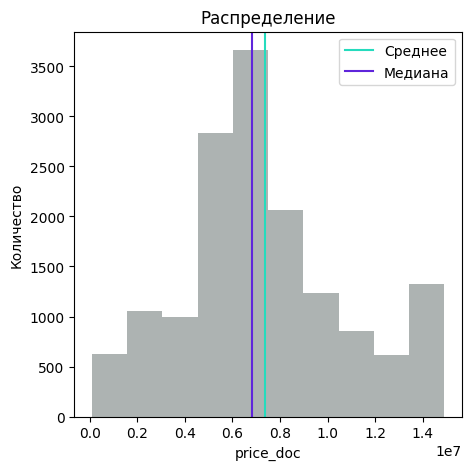

In [84]:
plt.figure(figsize=(5, 5))
plt.hist(df["price_doc"], color=['#adb3b2'])
plt.xlabel('price_doc')
plt.ylabel('Количество')
plt.title('Распределение')
plt.axvline(x=df['price_doc'].mean(), c='#25dbbd') #среднее
plt.axvline(x=df['price_doc'].median(), c='#5f25db') #медиана
plt.legend (('Среднее', 'Медиана'))
plt.show()

Распределение близко к нормальному, но можно заметить небольшой выброс количества недвижимости с высокой ценой

Посмотрим на распределение остальных признаков

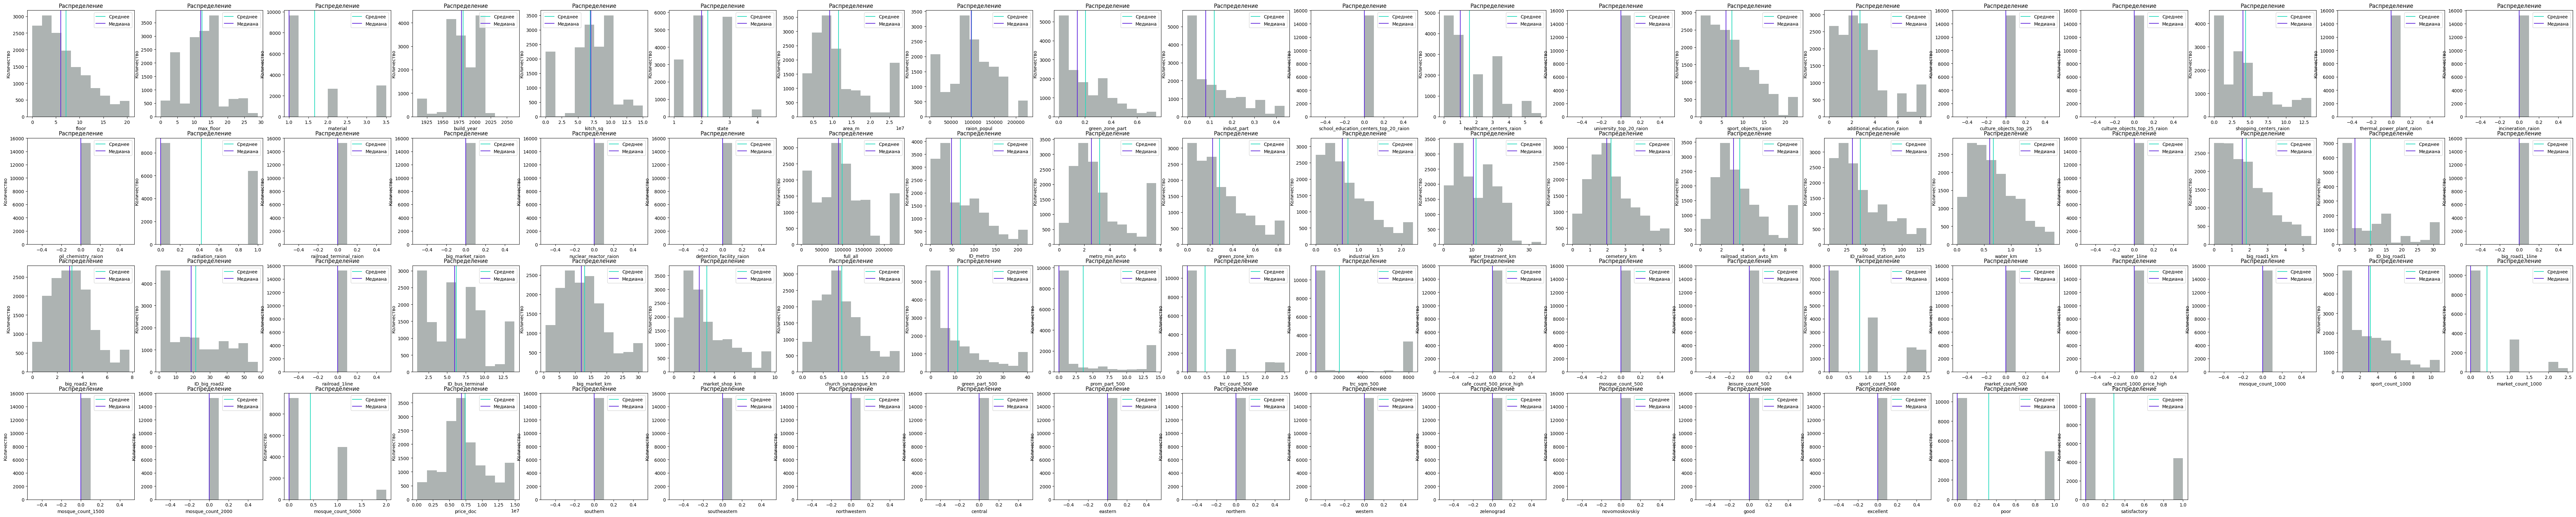

In [85]:
plt.figure(figsize=(100, 100))


for i in range(1, len(df.columns.tolist()) - 1):
  plt.subplot(20, 20, i)
  plt.hist(df[df.columns.tolist()[i + 1]], color=['#adb3b2'])
  plt.xlabel(df.columns.tolist()[i + 1])
  plt.ylabel('Количество')
  plt.title('Распределение')
  plt.axvline(x=df[df.columns.tolist()[i + 1]].mean(), c='#25dbbd') #среднее
  plt.axvline(x=df[df.columns.tolist()[i + 1]].median(), c='#5f25db') #медиана
  plt.legend (('Среднее', 'Медиана'))
plt.show()

В общем и целом признаки распределены достаточно естественно в контексте задачи, где-то имеется распределение бликое к нормальному, а где-то на геометрическое распределение

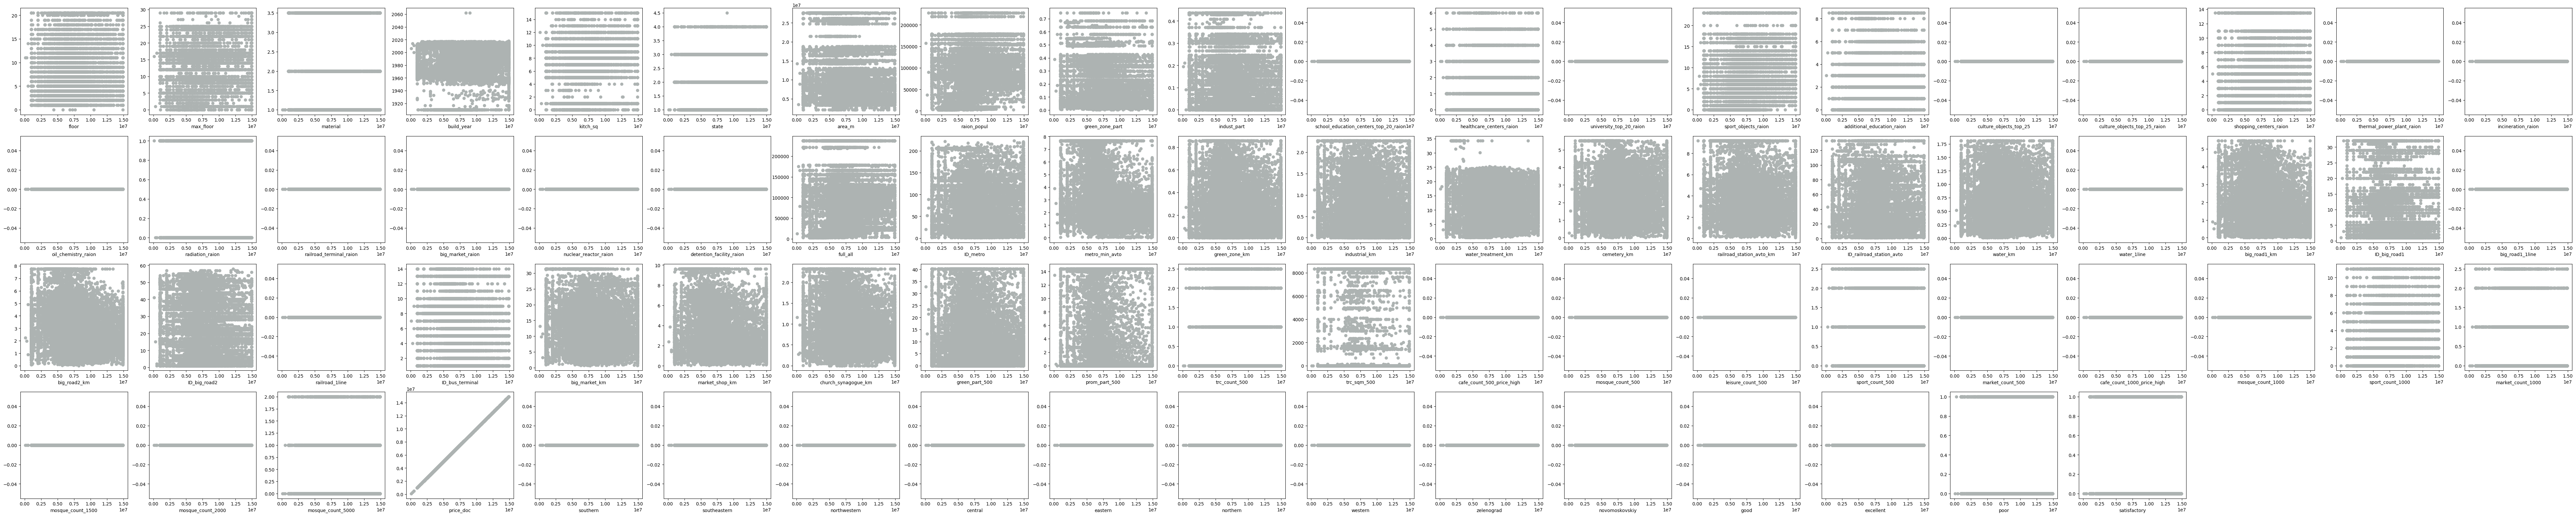

In [86]:
plt.figure(figsize=(100, 100))


for i in range(1, len(df.columns.tolist()) - 1):
  plt.subplot(20, 20, i)
  plt.scatter(df['price_doc'], df[df.columns.tolist()[i + 1]], color=['#adb3b2'])
  plt.xlabel(df.columns.tolist()[i + 1])
plt.show()

по диаграммам рассеивания можно заметить, что от какого-то конккретного признака цена не зависит, никаких зависимостей не просматривается

In [87]:
df.to_csv('dataset.csv', encoding='utf-8') # Запись готового датасета в csv